# Importing Libraries

In [1]:
!pip install seaborn
!pip install sklearn
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Our data set contains 891 rows and 12 columns


In [5]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [8]:
df = df[df['Embarked'].notna()]

In [9]:
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Our data set contains 889 rows and 11 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
df = df.astype({"Age": int})


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.498313,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.979638,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualization

### Survived has higher correlation with Pclass and Fare

<AxesSubplot:>

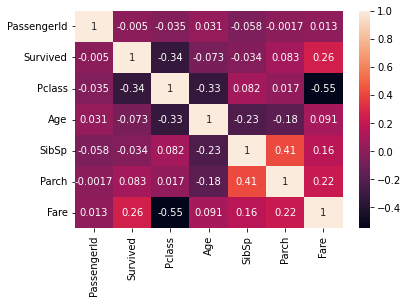

In [14]:
corr = df.corr()
sns.heatmap(corr, annot = True)



### More number of male passengers were present on the ship

[Text(0.5, 1.0, 'Number of Males and Females')]

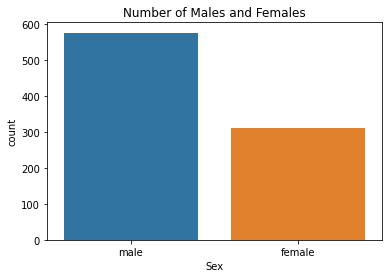

In [15]:
sns.countplot(x='Sex',data=df).set(title='Number of Males and Females')

<AxesSubplot:ylabel='Sex'>

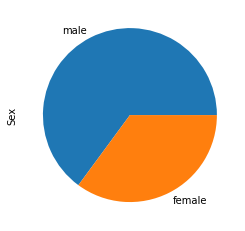

In [16]:
df['Sex'].value_counts().plot(kind='pie')

### More passengers were from class 3

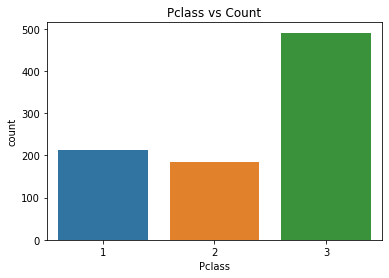

In [17]:
ax = sns.countplot(x="Pclass", data=df).set(title='Pclass vs Count')

### More number of men in 3 rd class than women

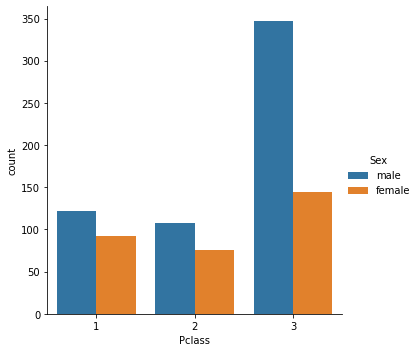

In [18]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

### Maximum number of passangers were aged between 20 - 40 years

<AxesSubplot:>

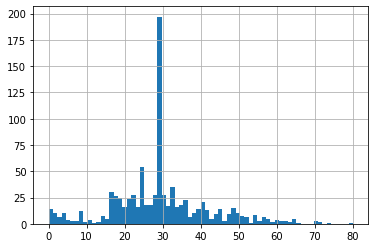

In [19]:
df['Age'].hist(bins=70)

###  Most of the passengers boarded at Queenstown are from 3rd class. And many passengers boarded at Southhampton

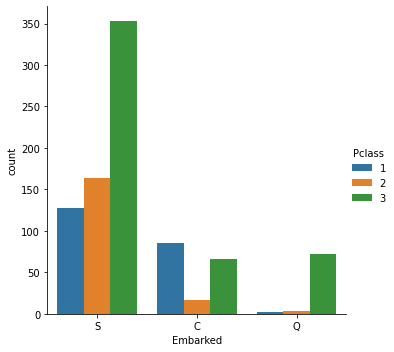

In [20]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

### The survivors were less than half of the passengers

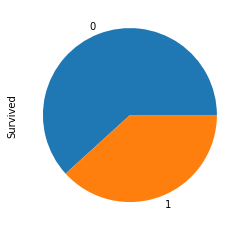

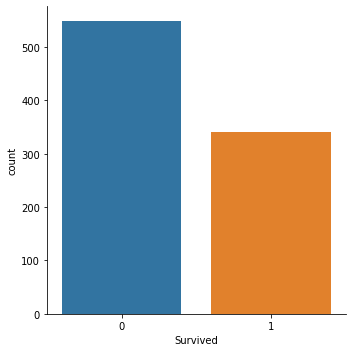

In [21]:
df['Survived'].value_counts().plot(kind='pie')
sns.factorplot('Survived',data=df,kind='count')

### Most of the passengers from class 3 didn't survive

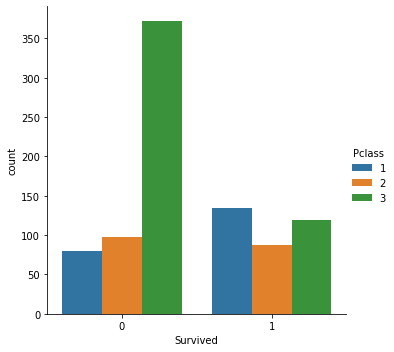

In [22]:
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')

### Passengers in age group 30-40 had higher number of survivors

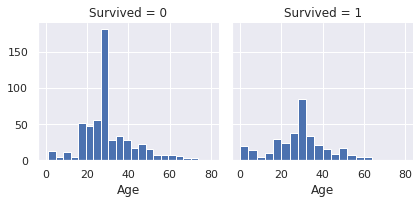

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

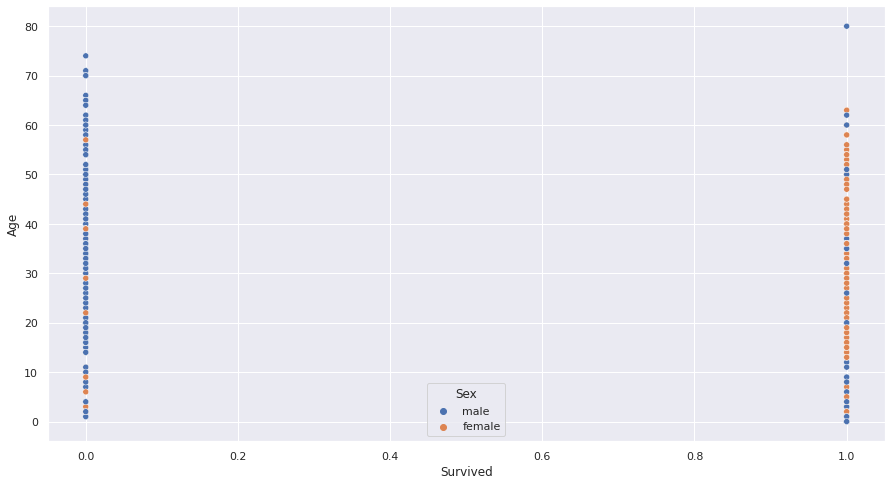

In [24]:
sns.scatterplot(x='Survived',y='Age',hue='Sex',data=df)
 


### Passengers in the age group 20-50 who paid higher fare had more survivor number

[Text(0.5, 1.0, 'Fare vs Age')]

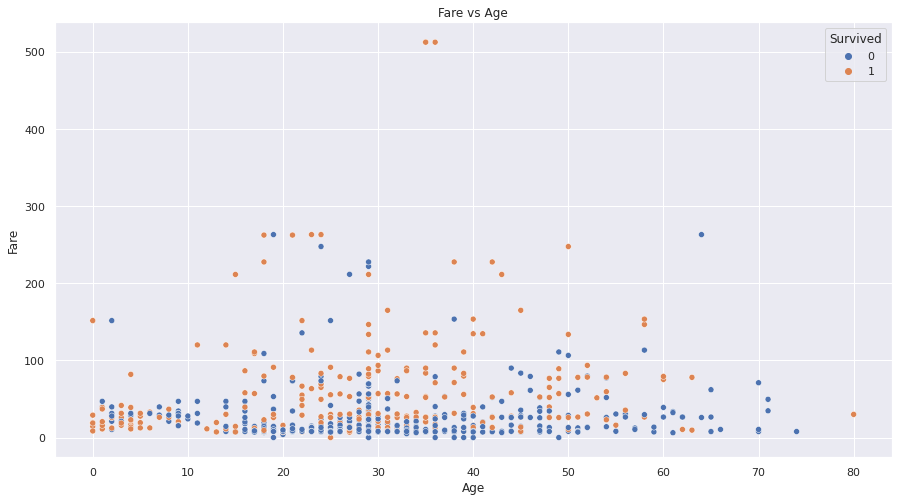

In [25]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df).set(title='Fare vs Age')

### Passengers from Pclass 1 who paid higher fare had more survivors

(<Figure size 504x504 with 1 Axes>, [Text(0.5, 1.0, 'Fare vs Survived')])

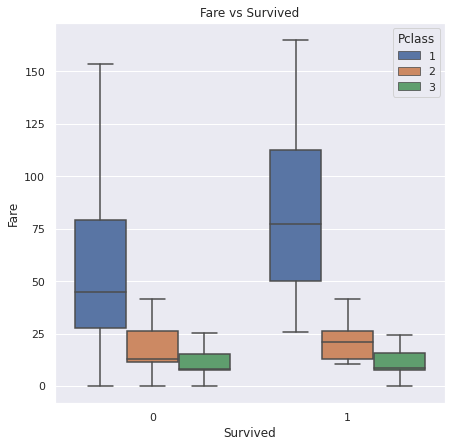

In [26]:
plt.figure(figsize=(7,7)), sns.boxplot(x='Survived',y='Fare',hue='Pclass',data=df, showfliers = False).set(title='Fare vs Survived')

[Text(0.5, 1.0, 'Age vs Sex')]

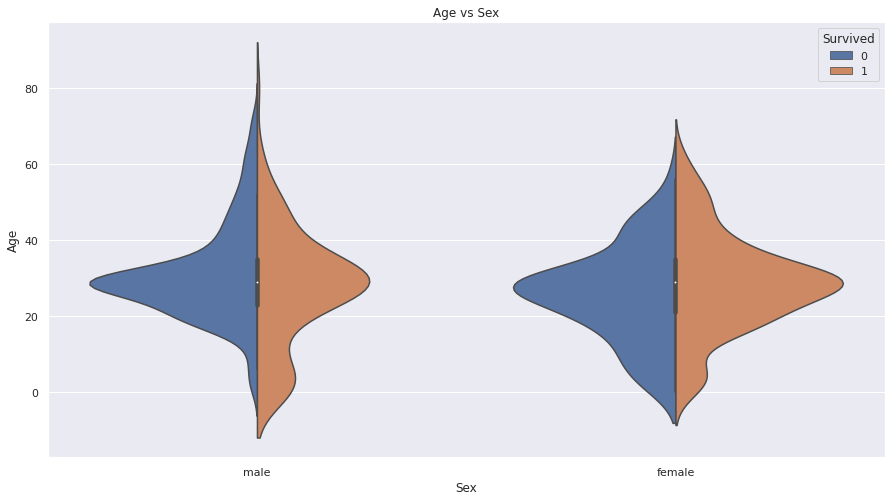

In [27]:

sns.violinplot(x='Sex', y='Age', data=df, hue='Survived', split=True).set(title='Age vs Sex')





[Text(0.5, 1.0, 'Age vs Sex')]

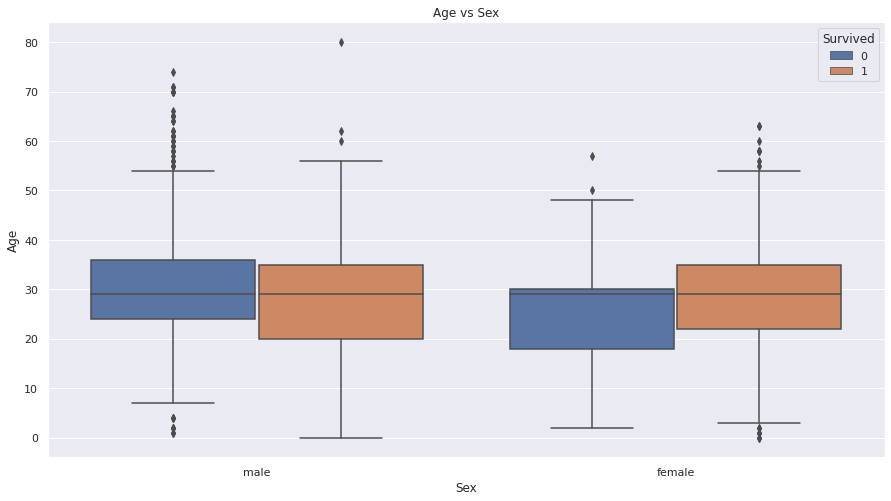

In [28]:
sns.boxplot(x='Sex', y='Age', data=df, hue='Survived').set(title='Age vs Sex')

### Passengers with family size 2-3 had higher survivor rate
### Passengers who were alone had lower survivor rate

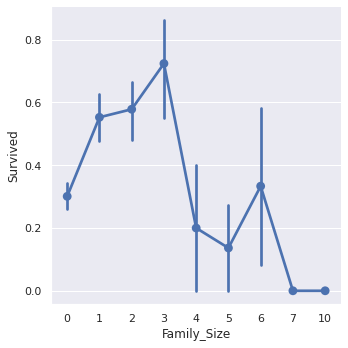

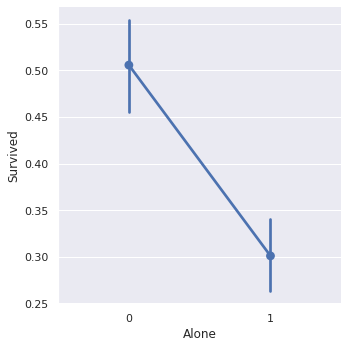

In [29]:

df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']


df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1

sns.factorplot(x ='Family_Size', y ='Survived', data = df)


sns.factorplot(x ='Alone', y ='Survived', data = df)


### The fare range from 0-100 has higher frequency
#### - Right Skewed distribution

[Text(0.5, 1.0, 'Count vs Fare')]

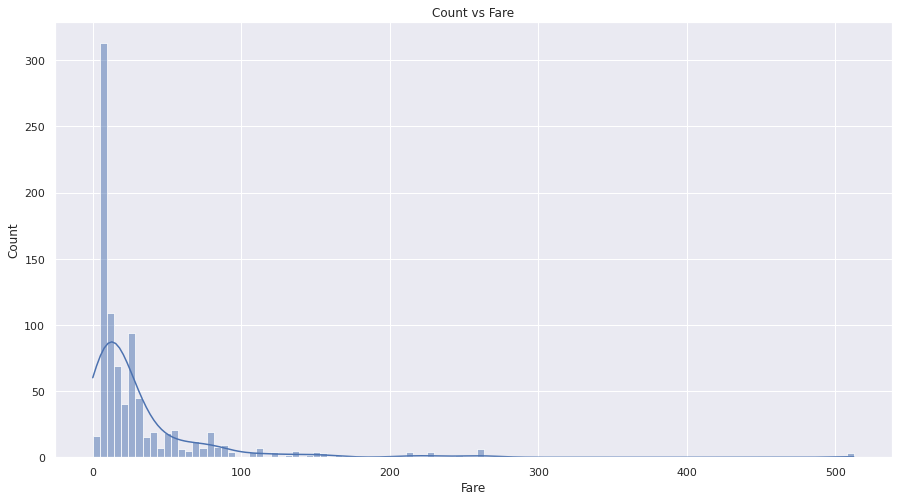

In [30]:
sns.histplot(df['Fare'],kde=True).set(title='Count vs Fare')